<a href="https://colab.research.google.com/github/ak-sh-at/Bioactivity-Prediction/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install chembl_webresource_client

## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### **Target search for coronavirus**

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase* (fifth entry)**

In [ ]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.shape

(133, 46)

In [ ]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

In [ ]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Iterate the *molecule_chembl_id* to a list**

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### **Iterate *canonical_smiles* to a list**

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
!conda install -c rdkit rdkit
!conda install pandas
!conda install numpy

Channels:
 - rdkit
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs

class ECFP6:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, name):
        bit_headers = ['bit' + str(i) for i in range(2048)]
        arr = np.empty((0,2048), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i)
            arr = np.vstack((arr, fp))
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)

In [ ]:
pip install pandas molvs


In [ ]:

import pandas as pd
from molvs import standardize_smiles


def main():

    smiles = [standardize_smiles(i) for i in df3['canonical_smiles'].values]

    ## Compute ECFP6 Fingerprints and export a csv file.
    ecfp6_descriptor = ECFP6(smiles)        # create your ECFP6 object and provide smiles
    ecfp6_descriptor.compute_ECFP6("Smiles") # compute ECFP6 and provide the name of your desired output file. you can use the same name as the input file because the ECFP6 class will ensure to add "_ECFP6.csv" as part of the output file.

if __name__ == '__main__':
    main()


[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerator
[07:01:21] DEPRECATION WARNING: please use MorganGenerat

***ECFP-6 binary vector***

In [ ]:
sm=pd.read_csv("/content/Sm_ECFP6.csv")
sm

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = float(i)*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis= 1)

    return x

In [ ]:
df3.standard_value.describe()

count         133
unique         93
top       15000.0
freq            5
Name: standard_value, dtype: object

In [ ]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis= 1)

    return x


In [ ]:
d=df3['standard_value'].dtype
d

dtype('O')

In [ ]:
df_norm = norm_value(df3)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,5.698970
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,4.970616


***Why pIC50 would be a better choice than IC50?***

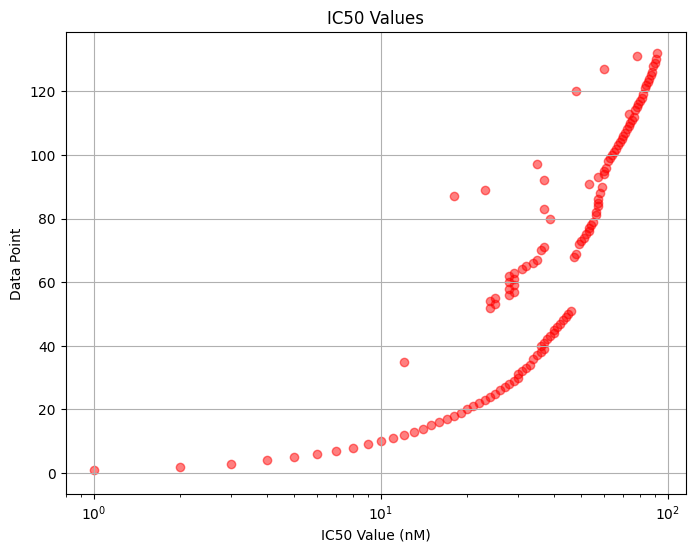

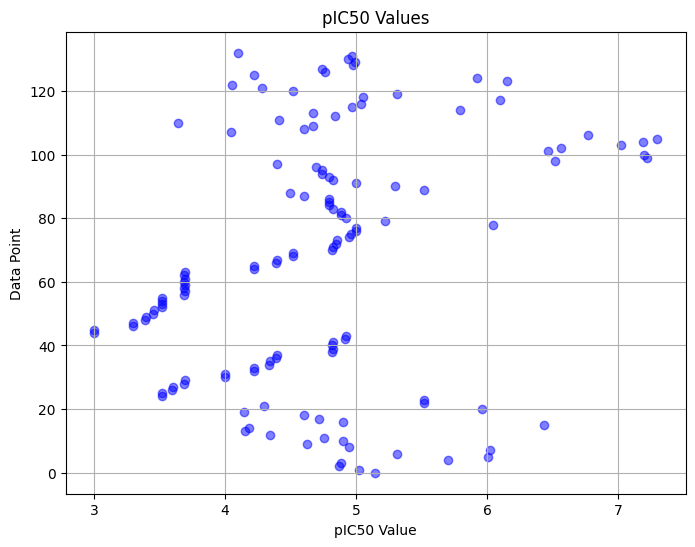

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ic50(input):
    # Plotting IC50 values
    plt.figure(figsize=(8, 6))
    plt.scatter(input['standard_value_norm'], range(len(input)), color='red', alpha=0.5)
    plt.xscale('log')  # Set x-axis to log scale since IC50 values can vary widely
    plt.xlabel('IC50 Value (nM)')
    plt.ylabel('Data Point')
    plt.title('IC50 Values')
    plt.grid(True)
    plt.show()

def plot_pic50(input):

    # Plotting pIC50 values
    plt.figure(figsize=(8, 6))
    plt.scatter(input['pIC50'], range(len(input)), color='blue', alpha=0.5)
    plt.xlabel('pIC50 Value')
    plt.ylabel('Data Point')
    plt.title('pIC50 Values')
    plt.grid(True)
    plt.show()

# Assuming 'input' is your DataFrame with 'standard_value_norm' column
# Call the functions to plot
plot_ic50(df_norm)
plot_pic50(df_final)


In [ ]:
import numpy as np

df_norm['standard_value_norm'] = pd.to_numeric(df_norm['standard_value_norm'], errors='coerce')

ic50_std = np.std(df_norm['standard_value_norm'])
pic50_std = np.std(df_final['pIC50'])

print("Standard Deviation of IC50 values:", ic50_std)
print("Standard Deviation of pIC50 values:", pic50_std)


Standard Deviation of IC50 values: 158298.8337430011
Standard Deviation of pIC50 values: 0.917441730803174


In [ ]:
dfc=pd.concat([sm,df_final],axis=1)
dfc

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,5.142668
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,5.026872
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,4.869666
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,4.882397
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,4.974694
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,4.995679
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,4.939302
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,4.970616


In [ ]:
dt = dfc[dfc.bioactivity_class != 'intermediate']
dt

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,4.869666
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,4.882397
5,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,6.008774
7,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,6.022276
8,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,4.974694
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,4.995679
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,4.939302
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,4.970616


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Normalize values in a specific column between 0 and 1
scaler = MinMaxScaler()
dt['pIC50'] = np.round(scaler.fit_transform(dt[['pIC50']]))
dt



<ipython-input-37-dcded1d32b05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['pIC50'] = np.round(scaler.fit_transform(dt[['pIC50']]))


,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,0.0
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,0.0
5,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,1.0
7,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,1.0
8,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,0.0
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,0.0
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,0.0
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,0.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X =dt.iloc[:, 1:2049].values
y = dt['pIC50'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the DNN model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2048,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Epoch 1/100
2/2 [==============================] - 1s 252ms/step - loss: 0.5607 - accuracy: 0.8571 - val_loss: 0.3797 - val_accuracy: 0.8636
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 0.3242 - accuracy: 0.8810 - val_loss: 0.3024 - val_accuracy: 0.8636
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 0.2436 - accuracy: 0.8810 - val_loss: 0.2906 - val_accuracy: 0.8636
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2195 - accuracy: 0.8810 - val_loss: 0.2816 - val_accuracy: 0.8636
Epoch 5/100
2/2 [==============================] - 0s 60ms/step - loss: 0.1724 - accuracy: 0.8810 - val_loss: 0.2705 - val_accuracy: 0.8636
Epoch 6/100
2/2 [==============================] - 0s 57ms/step - loss: 0.1593 - accuracy: 0.9048 - val_loss: 0.2605 - val_accuracy: 0.8636
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 0.1320 - accuracy: 0.9405 - val_loss: 0.2526 - val_accuracy: 0.8636
Epoch 8/100
2/2 [==